### ANOVA Test  
  
Suppose you’ve become involved in a clinical trial in which you are testing a new antidepressant drug called Joyzepam. In order to construct a fair test of the drug’s effectiveness, the study involves three separate drugs to be administered. One is a placebo, and the other is an existing antidepressant / anti-anxiety drug called Anxifree.  

A collection of 18 participants with moderate to severe depression are recruited for your initial testing. Because the drugs are sometimes administered in conjunction with psychological therapy, your study includes 9 people undergoing cognitive behavioural therapy (CBT) and 9 who are not.  
 
Participants are randomly assigned (doubly blinded, of course) a treatment, such that there are 3 CBT people and 3 no-therapy people assigned to each of the 3 drugs. A psychologist assesses the mood of each person after a 3 month run with each drug: and the overall improvement in each person’s mood is assessed on a scale ranging from -5 to + 5.

In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/clintrial.csv")
df

,drug,therapy,mood_gain
0,placebo,no.therapy,0.5
1,placebo,no.therapy,0.3
2,placebo,no.therapy,0.1
3,anxifree,no.therapy,0.6
4,anxifree,no.therapy,0.4
5,anxifree,no.therapy,0.2
6,joyzepam,no.therapy,1.4
7,joyzepam,no.therapy,1.7
8,joyzepam,no.therapy,1.3
9,placebo,CBT,0.6


In [2]:

class_counts = df['drug'].value_counts()

# This will print the frequency of each class in 'category_column'.
print(class_counts)


drug
placebo     6
anxifree    6
joyzepam    6
Name: count, dtype: int64
Number of unique classes: 3


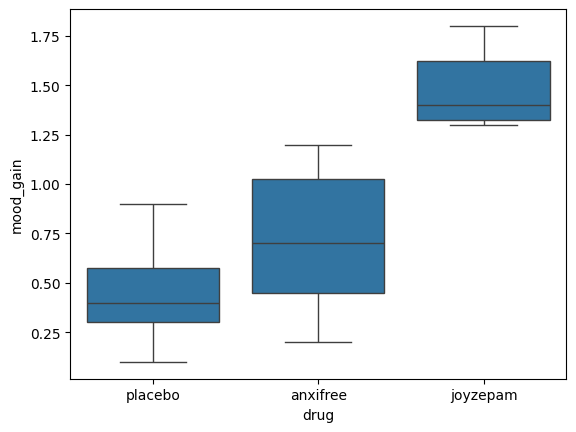

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot with seaborn
sns.boxplot(x='drug', y='mood_gain', data=df)

# Show the plot
plt.show()


 This demonstrates the ANOVA process and result.

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit an ANOVA model
model1 = smf.ols('mood_gain ~ C(drug)', data=df).fit()
#C() tells Python that drug is a categorical variable.
anova_table1 = sm.stats.anova_lm(model1)  

# Display table
print("ANOVA Summary Table")
print(anova_table1)


ANOVA Summary Table
            df    sum_sq   mean_sq          F    PR(>F)
C(drug)    2.0  3.453333  1.726667  18.610778  0.000086
Residual  15.0  1.391667  0.092778        NaN       NaN
